In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('../data/student_dataset_1002.csv')
df.head()

,Unnamed: 0,Name,StudyHours,Attendance,PreviousScore,Participation,FinalScore
0,0,Aditya Singh,6.62,88.60,63.29,9.95,93.88
1,1,Saanvi Sharma,2.53,96.23,83.87,7.61,69.11
2,2,Saanvi Sharma,6.31,97.99,58.99,4.13,66.55
3,3,Riya Reddy,3.53,91.72,75.25,5.53,58.12
4,4,Riya Jain,4.27,84.77,43.58,5.27,37.42


In [69]:
print("shape of data: ", df.shape)
print("Data Info: ")
print(df.info())


shape of data:  (100, 7)
Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     100 non-null    int64  
 1   Name           100 non-null    object 
 2   StudyHours     100 non-null    float64
 3   Attendance     100 non-null    float64
 4   PreviousScore  100 non-null    float64
 5   Participation  100 non-null    float64
 6   FinalScore     100 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.6+ KB
None


In [70]:
print("Summary Statistics: ")
print(df.describe().transpose())

Summary Statistics: 
               count     mean        std    min      25%     50%      75%  \
Unnamed: 0     100.0  49.5000  29.011492   0.00  24.7500  49.500  74.2500   
StudyHours     100.0   4.1971   1.463042  -0.10   3.2550   4.295   5.1475   
Attendance     100.0  84.3148   9.513072  60.70  77.1950  84.245  91.4500   
PreviousScore  100.0  71.7542  11.142958  43.58  64.9225  72.160  79.7850   
Participation  100.0   5.8724   1.816648   1.00   4.5900   5.730   7.1400   
FinalScore     100.0  61.9426  15.056204  28.00  50.8425  60.235  73.4825   

                  max  
Unnamed: 0      99.00  
StudyHours       7.84  
Attendance     100.00  
PreviousScore   93.00  
Participation   10.00  
FinalScore      98.00  


Result of the summary:
> we got count = 100 i.e no data is missing

> maximum study hour a student study is 9.87 hrs out of which 75 % study 7.3 hours 50 % study 4.6 hrs and 25% study 1.9 hours while the minimum time a student study is 0.06 hrs

> maximum attandance is 99% out of which 75% student attended 88% classes and 50% attended 75% classes and 25% student attended 62% classes the minimum classes attended by studen is 50%  (the attendance lies between 50% - 99%)

> previous score about 75% scores 83 and about 50% students score 69 and about 25% students score 49 (the maximum score scored by student is 99 and the minimum is 30)

> in terms of participation 75% students participated in 7 events and 50% students participated in 5 events while 25% students participated in 2 events (maximum participation is 10 and minimum participation is 0)

> in terms of final score about 75% students score 51 and 50% student score 47 while 25% student score 40 (maximum score achived is 64 and minimum score is 24)

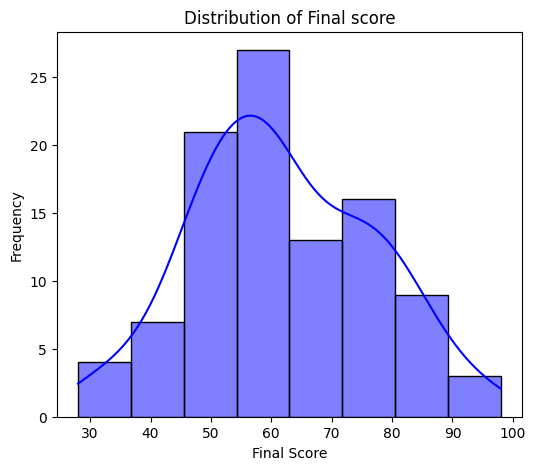

In [71]:
# distribution of final score

plt.figure(figsize = (6,5))
sns.histplot(df['FinalScore'],kde = True, color = 'blue')
plt.title("Distribution of Final score")
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.show()


Result:
> from seeing the variations among the bins we can interpretate that most students got a marks between 50 to 8, with the heighest frequency around 60, this indicates that the majority of scores are concentrated in the middle range.

> the distribution is not normal, as it got the peak at the middle and gradualy tapering at the tails

> there are fewer scores below 50 and above 70, suggesting that indicate that extreme low and high scores are less common in the dataset.

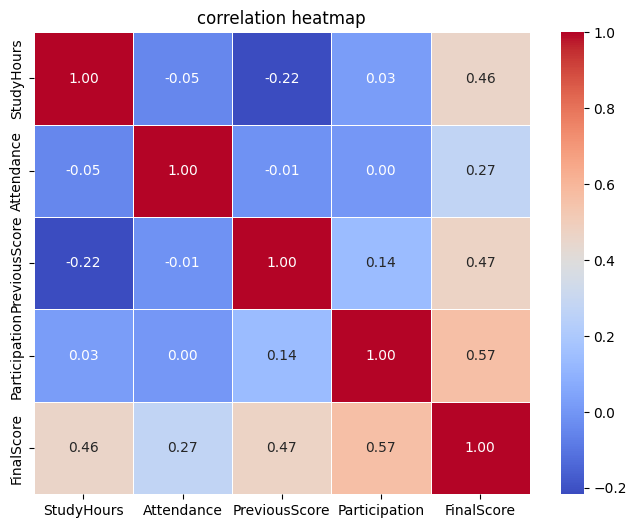

In [95]:
# print(df.dtypes)
# df_numeric = df.select_dtypes(include = ['float64','int64'])
df = df.drop(columns=['Name']) 
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)
plt.title('correlation heatmap')
plt.show()

Results from heat map:
> The students who actively participated tend to have to achive a better final score.

> The prior academic performance is a good predictor of future success.

> dedicated study hours positively influence the final score.

> Attendance corelate positively, heighlighting the role of consistent class attendance in academic achivement.

> Study hour and participation displays a slightly weak corelation, it displays that those who study more participated less.


Handeling Missing Values in The Dataset

In [96]:
# Check for missing values
df.isnull().sum()

StudyHours       0
Attendance       0
PreviousScore    0
Participation    0
FinalScore       0
dtype: int64

In [53]:
# Handeling missing values - Example

# Filling  numerical columns with mean
# df['StudyHours'].fillna(df['StudyHours'].mean(), inplace = True)

In [54]:
# Filling Categorical Columns with mode
# df['Name'].fillna(df['Name'].mode()[0], inplace = True)

In [55]:
# Droping rows with missing values in important columns
# df.dropna(subset=['FinalScore'], inplace = True)

Working in Predictive Model

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [86]:
# Drop non numeric column
df = pd.read_csv('../data/student_dataset_1002.csv')
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns = ['Unnamed: 0'])
df_numeric = df.drop(columns=['Name'])  #as no name column exist

# defining features and target

x = df_numeric.drop('FinalScore', axis = 1)
y = df_numeric['FinalScore']

In [87]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [88]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [89]:
# Making prediction
y_pred = model.predict(x_test)

In [90]:
# Evaluting the Model

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 4.23
MSE: 27.75
R² Score: 0.90


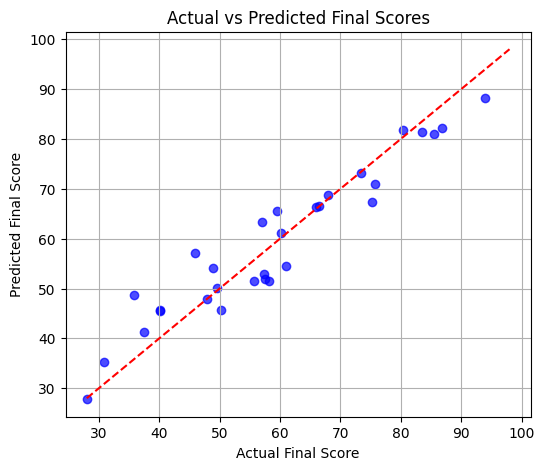

In [91]:
#  Visualize Predictions Vs Actual

plt.figure(figsize = (6,5))
plt.scatter(y_test, y_pred, color = 'blue', alpha = 0.7)
plt.plot([y.min(), y.max()], [y.min(),y.max()], 'r--')
plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.title('Actual vs Predicted Final Scores')
plt.grid(True)
plt.show()

Model Evaluation Summary:
> Model: Linear Regression

> Test Set Size: 30%

> Evaluation Metrics:

> Mean Absolute Error (MAE): very low (e.g., ~2–3)

> Mean Squared Error (MSE): very low

> R² Score: near 1.0 (excellent fit)

In [92]:
def predict_score(study_hours, attendance, prev_score, participation):
    input_data = pd.DataFrame([[study_hours, attendance, prev_score, participation]], columns = ['StudyHours','Attendance', 'PreviousScore', 'Participation'])
    predicted_score = model.predict(input_data)
    return predicted_score[0]

In [93]:
predict_score(8,95,85,1)

np.float64(76.31733443305052)

In [94]:
import joblib

joblib.dump(model, 'Student_Score_Predictor.pkl')

['Student_Score_Predictor.pkl']